In [2]:
from lifelines.datasets import load_waltons
df = load_waltons()
df = df.iloc[34:55][['T','E']]
df

,T,E
34,33.0,1
35,54.0,1
36,54.0,1
37,61.0,1
38,61.0,1
39,61.0,0
40,61.0,1
41,61.0,0
42,61.0,1
43,61.0,1


In [3]:
from lifelines.utils import survival_table_from_events
table = survival_table_from_events(df['T'], df['E'])
table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,21,21
33.0,1,1,0,0,21
54.0,2,2,0,0,20
61.0,11,9,2,0,18
69.0,7,6,1,0,7


In [4]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(df['T'], event_observed=df['E'])
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
33.0,0.952381
54.0,0.857143
61.0,0.428571
69.0,0.061224


<Axes: xlabel='timeline'>

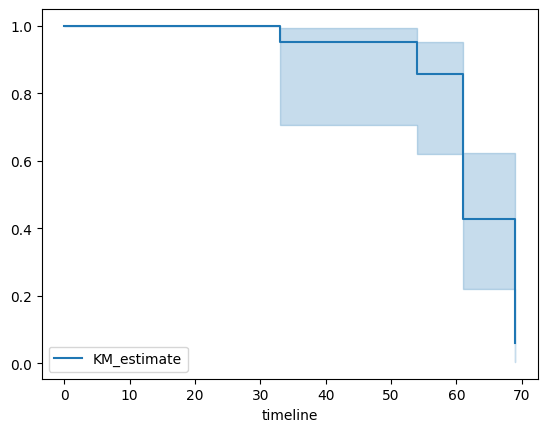

In [5]:
kmf.plot_survival_function()

In [6]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter(nelson_aalen_smoothing=False)
naf.fit(df['T'], event_observed=df['E'])
naf.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
33.0,0.047619
54.0,0.147619
61.0,0.647619
69.0,1.504762


<Axes: xlabel='timeline'>

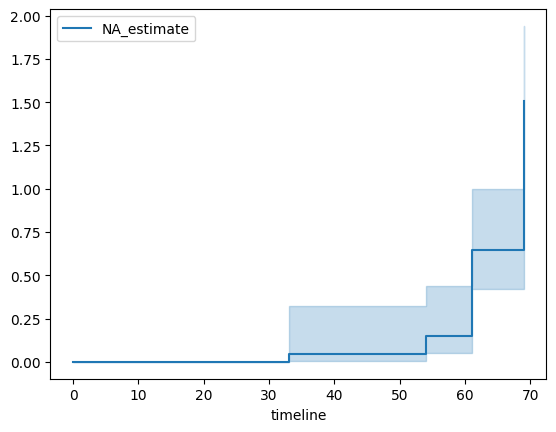

In [7]:
naf.plot_cumulative_hazard()

<Axes: >

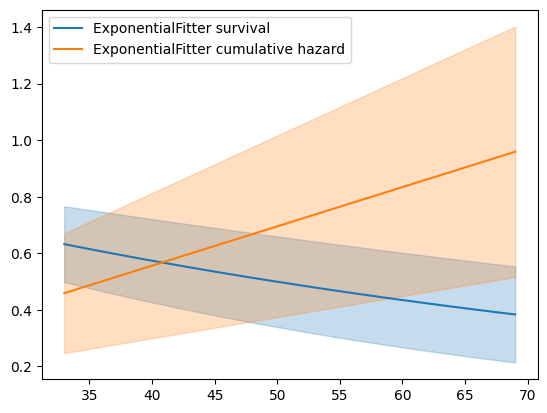

In [8]:
from lifelines import ExponentialFitter
exf = ExponentialFitter().fit(df['T'], df['E'])
exf.plot_survival_function(label='ExponentialFitter survival')
exf.plot_cumulative_hazard(label='ExponentialFitter cumulative hazard')

<Axes: >

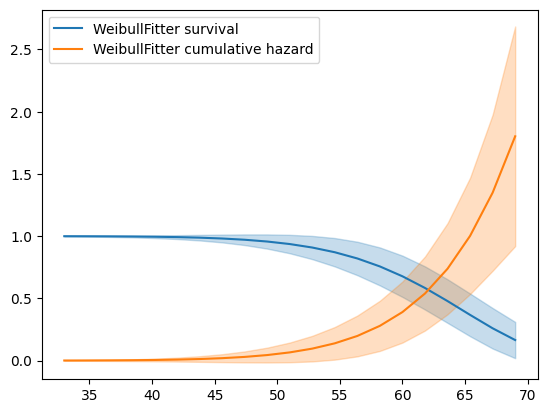

In [10]:
from lifelines import WeibullFitter
wbf = WeibullFitter().fit(df['T'], df['E'], label='WeibullFitter')
wbf.plot_survival_function(label='WeibullFitter survival')
wbf.plot_cumulative_hazard(label='WeibullFitter cumulative hazard')

<Axes: xlabel='timeline'>

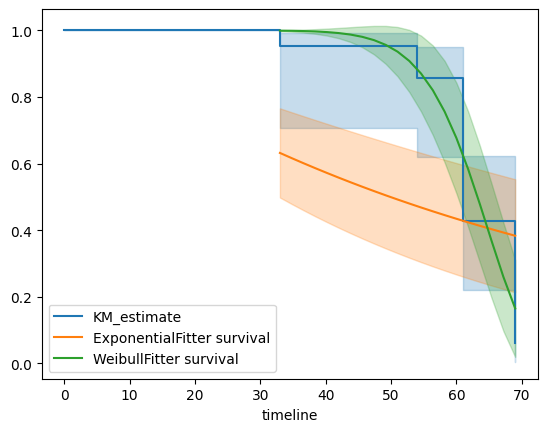

In [11]:
kmf.plot_survival_function()
exf.plot_survival_function(label='ExponentialFitter survival')
wbf.plot_survival_function(label='WeibullFitter survival')

In [12]:
print('Exponential model: ', exf.AIC_)
print('Weibull model: ', wbf.AIC_)

Exponential model:  191.93219178454947
Weibull model:  131.5771891044874


In [13]:
import numpy as np
df['female'] = np.random.choice([0, 1], size=21, p=[.6, .4])
df

,T,E,female
34,33.0,1,0
35,54.0,1,0
36,54.0,1,0
37,61.0,1,1
38,61.0,1,0
39,61.0,0,0
40,61.0,1,0
41,61.0,0,1
42,61.0,1,1
43,61.0,1,1


<lifelines.CoxPHFitter: fitted with 21 total observations, 3 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 21
number of events observed = 18
   partial log-likelihood = -41.08
         time fit was run = 2024-09-25 13:53:49 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
female    -0.09      0.91      0.49           -1.05            0.86                0.35                2.36

           cmp to     z    p  -log2(p)
covariate                             
female       0.00 -0.20 0.85      0.24
---
Concordance = 0.57
Partial AIC = 84.17
log-likelihood ratio test = 0.04 on 1 df
-log2(p) of ll-ratio test = 0.24

<Axes: xlabel='log(HR) (95% CI)'>

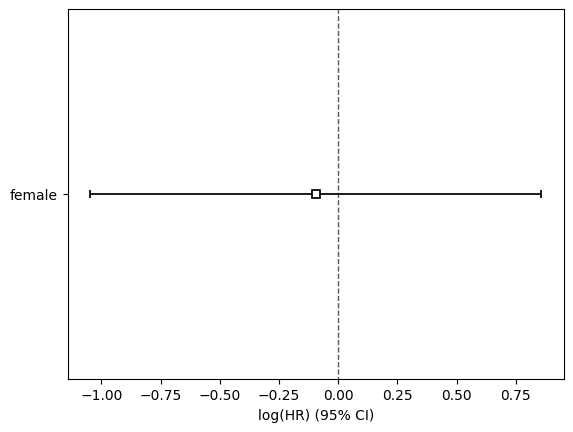

In [14]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(df[['T', 'E', 'female']], duration_col='T', event_col='E')
cph.print_summary()
cph.plot()

<Axes: >

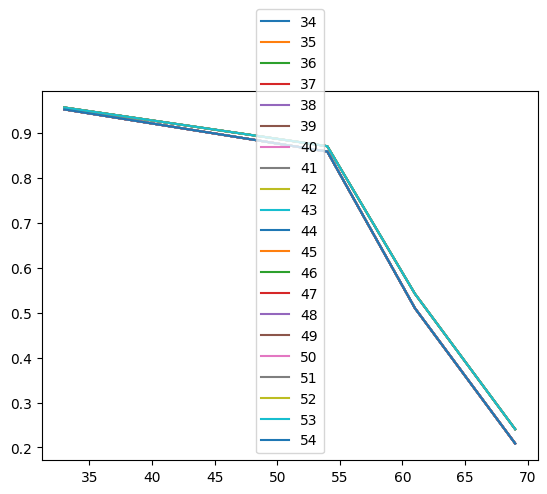

In [15]:
cph.predict_survival_function(df).plot()